In [11]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf

In [20]:
start = '2013-01-01'
end = '2023-12-31'
stock = 'AAPL'
df = yf.download(stock, start, end)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,19.779285,19.821428,19.343929,19.608213,16.769091,560518000
2013-01-03,19.567142,19.631071,19.321428,19.360714,16.557434,352965200
2013-01-04,19.177500,19.236786,18.779642,18.821428,16.096231,594333600
2013-01-07,18.642857,18.903570,18.400000,18.710714,16.001545,484156400
2013-01-08,18.900356,18.996071,18.616072,18.761070,16.044613,458707200


In [21]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.600006,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,193.050003,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,193.149994,48087700
2023-12-28,194.139999,194.660004,193.169998,193.580002,193.580002,34049900
2023-12-29,193.899994,194.399994,191.729996,192.529999,192.529999,42628800


In [22]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.779285,19.821428,19.343929,19.608213,16.769091,560518000
1,2013-01-03,19.567142,19.631071,19.321428,19.360714,16.557434,352965200
2,2013-01-04,19.177500,19.236786,18.779642,18.821428,16.096231,594333600
3,2013-01-07,18.642857,18.903570,18.400000,18.710714,16.001545,484156400
4,2013-01-08,18.900356,18.996071,18.616072,18.761070,16.044613,458707200


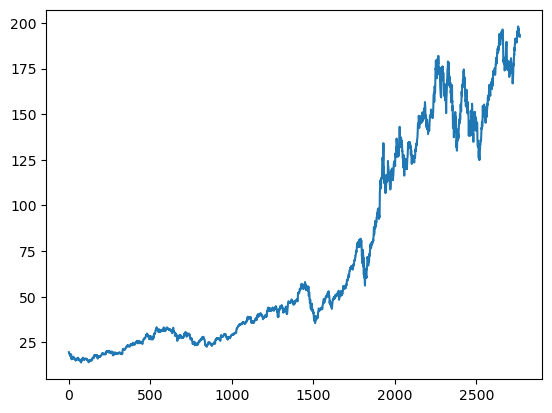

In [26]:
plt.plot(df.Close)

In [27]:
df

,Date,Open,High,Low,Close,Volume
0,2013-01-02,19.779285,19.821428,19.343929,19.608213,560518000
1,2013-01-03,19.567142,19.631071,19.321428,19.360714,352965200
2,2013-01-04,19.177500,19.236786,18.779642,18.821428,594333600
3,2013-01-07,18.642857,18.903570,18.400000,18.710714,484156400
4,2013-01-08,18.900356,18.996071,18.616072,18.761070,458707200
...,...,...,...,...,...,...
2763,2023-12-22,195.179993,195.410004,192.970001,193.600006,37122800
2764,2023-12-26,193.610001,193.889999,192.830002,193.050003,28919300
2765,2023-12-27,192.490005,193.500000,191.089996,193.149994,48087700
2766,2023-12-28,194.139999,194.660004,193.169998,193.580002,34049900


In [29]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2763    181.768301
2764    181.787101
2765    181.898701
2766    182.046001
2767    182.173301
Name: Close, Length: 2768, dtype: float64

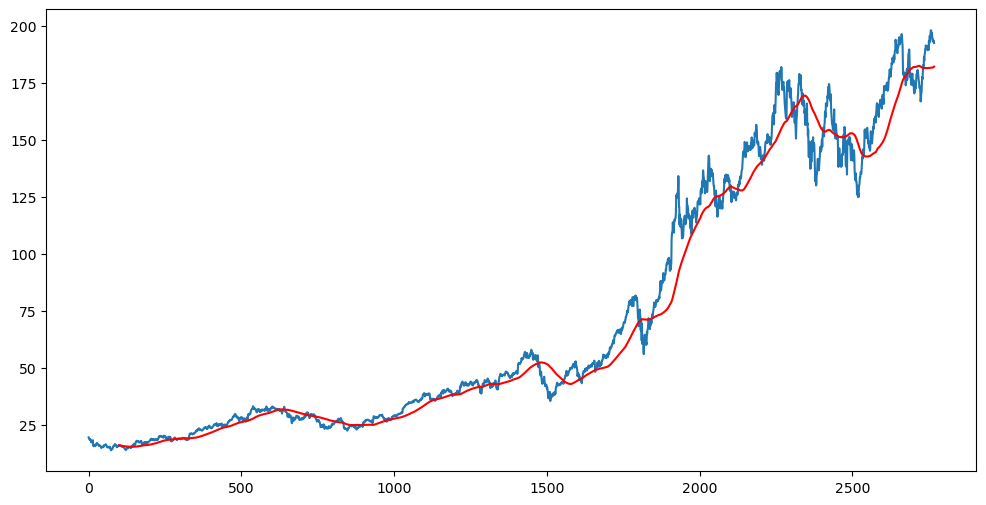

In [30]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [31]:
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2763    178.649100
2764    178.871851
2765    179.085250
2766    179.290201
2767    179.487900
Name: Close, Length: 2768, dtype: float64

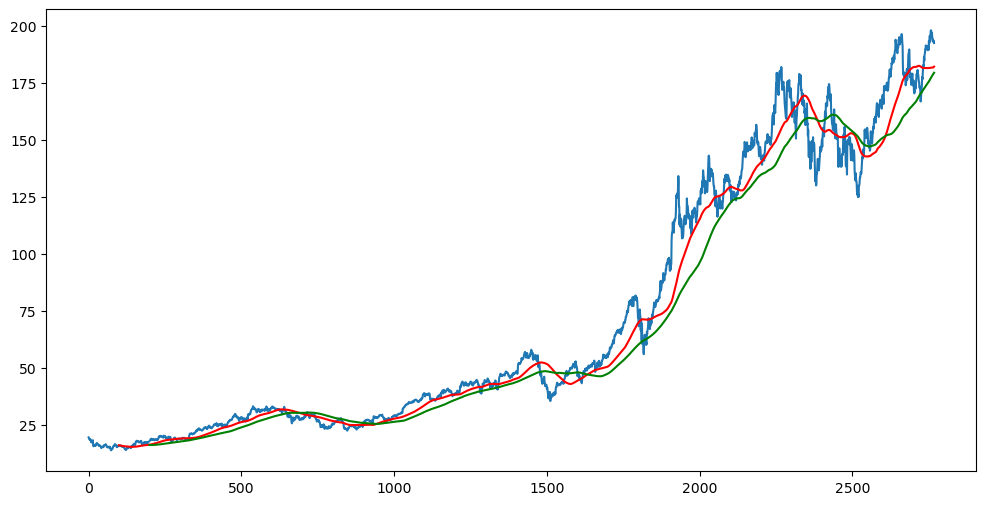

In [32]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [33]:
df.shape

(2768, 6)

In [34]:
#Splitting data into Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1937, 1)
(831, 1)


In [35]:
data_training.head()

,Close
0,19.608213
1,19.360714
2,18.821428
3,18.710714
4,18.761070


In [37]:
data_testing.head()

,Close
1937,112.000000
1938,115.360001
1939,115.540001
1940,112.129997
1941,110.339996


In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [39]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.04708139],
       [0.04502289],
       [0.04053753],
       ...,
       [0.82234426],
       [0.85977174],
       [0.82791678]])

In [41]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train , y_train = np.array(x_train), np.array(y_train)

In [44]:
x_train.shape

(1837, 100, 1)

In [42]:
# ML Model

In [43]:
from keras.layers import Dense , Dropout , LSTM
from keras.models import Sequential

In [45]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))



model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))



model.add(Dense(units = 1))

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [48]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
58/58 [==============================] - 6s 90ms/step - loss: 0.0144
Epoch 2/50
58/58 [==============================] - 5s 91ms/step - loss: 0.0031
Epoch 3/50
58/58 [==============================] - 5s 92ms/step - loss: 0.0029
Epoch 4/50
58/58 [==============================] - 5s 93ms/step - loss: 0.0030
Epoch 5/50
58/58 [==============================] - 5s 93ms/step - loss: 0.0025
Epoch 6/50
58/58 [==============================] - 5s 93ms/step - loss: 0.0024
Epoch 7/50
58/58 [==============================] - 5s 93ms/step - loss: 0.0021
Epoch 8/50
58/58 [==============================] - 5s 93ms/step - loss: 0.0019
Epoch 9/50
58/58 [==============================] - 5s 94ms/step - loss: 0.0021
Epoch 10/50
58/58 [==============================] - 5s 93ms/step - loss: 0.0019
Epoch 11/50
58/58 [==============================] - 5s 93ms/step - loss: 0.0017
Epoch 12/50
58/58 [==============================] - 5s 93ms/step - loss: 0.0019
Epoch 13/50
58/58 [==================

In [50]:
model.save('keras_model.h5')

In [57]:
past_100_days = data_training.tail(100)

In [90]:
final_df = pd.concat([past_100_days , data_testing], ignore_index=True)

In [91]:
data_testing.shape

(831, 1)

In [92]:
final_df.head()

,Close
0,67.092499
1,69.025002
2,68.757500
3,70.742500
4,70.792503


In [93]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.        ],
       [0.01474996],
       [0.01270823],
       [0.02785889],
       [0.02824054],
       [0.01948211],
       [0.03694166],
       [0.04852404],
       [0.03949856],
       [0.04730286],
       [0.05569867],
       [0.06155668],
       [0.06749097],
       [0.07968403],
       [0.08899577],
       [0.08212645],
       [0.07495182],
       [0.07855823],
       [0.0750663 ],
       [0.08890033],
       [0.08542756],
       [0.09704813],
       [0.09250675],
       [0.09639937],
       [0.09227778],
       [0.09491097],
       [0.09517813],
       [0.09458661],
       [0.10204746],
       [0.10489057],
       [0.10828706],
       [0.10294429],
       [0.12046101],
       [0.12420096],
       [0.14429369],
       [0.16118076],
       [0.12885683],
       [0.13439043],
       [0.14238555],
       [0.15973055],
       [0.15879558],
       [0.15906275],
       [0.15522736],
       [0.17268685],
       [0.18730323],
       [0.17495755],
       [0.18407846],
       [0.162

In [94]:
input_data.shape

(931, 1)

In [96]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i,0])

In [97]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(831, 100, 1)
(831,)


In [98]:
# Making Prediction

y_predicted = model.predict(x_test)

26/26 [==============================] - 1s 23ms/step


In [99]:
y_predicted.shape

(831, 1)

In [100]:
y_test

array([0.34275956, 0.36840499, 0.36977886, 0.34375177, 0.33008947,
       0.30337548, 0.32810504, 0.34130935, 0.30551265, 0.31390846,
       0.34489667, 0.36535195, 0.3587116 , 0.37183963, 0.37931957,
       0.35054475, 0.37710612, 0.35161337, 0.36626788, 0.3654283 ,
       0.38069343, 0.43740342, 0.41221592, 0.41290288, 0.40923922,
       0.39634016, 0.37313721, 0.38481503, 0.37993019, 0.37138169,
       0.36596257, 0.36603892, 0.37786936, 0.33665348, 0.36809968,
       0.3187933 , 0.31810634, 0.33085277, 0.36527561, 0.3964165 ,
       0.39382146, 0.37573225, 0.37306086, 0.39992748, 0.39779037,
       0.39817202, 0.4061099 , 0.39916423, 0.38878394, 0.39343981,
       0.38351745, 0.3568798 , 0.36695479, 0.3735188 , 0.37779302,
       0.39656919, 0.4245807 , 0.42732843, 0.42625987, 0.42099338,
       0.43244223, 0.43725073, 0.41740607, 0.42854961, 0.42221462,
       0.41740607, 0.46396472, 0.46343044, 0.47022342, 0.45465304,
       0.46663611, 0.49449505, 0.4874731 , 0.49518195, 0.53120

In [101]:
y_predicted

array([[0.45493472],
       [0.44463605],
       [0.43231392],
       [0.41916412],
       [0.40588588],
       [0.3928448 ],
       [0.38002253],
       [0.36774313],
       [0.35653943],
       [0.34642333],
       [0.33742386],
       [0.3299505 ],
       [0.32462972],
       [0.3217361 ],
       [0.32140642],
       [0.32359272],
       [0.32745218],
       [0.332514  ],
       [0.33791316],
       [0.34316665],
       [0.347968  ],
       [0.3523934 ],
       [0.35748857],
       [0.36359084],
       [0.37059796],
       [0.37806976],
       [0.38522518],
       [0.39099616],
       [0.3949631 ],
       [0.3970539 ],
       [0.39732605],
       [0.39595753],
       [0.39325827],
       [0.3897581 ],
       [0.3854146 ],
       [0.38063204],
       [0.3752162 ],
       [0.3690508 ],
       [0.36236376],
       [0.35592836],
       [0.35087144],
       [0.34800327],
       [0.34737188],
       [0.34856126],
       [0.35146356],
       [0.35583538],
       [0.3612855 ],
       [0.367

In [102]:
scaler.scale_

array([0.00763257])

In [103]:
scale_factor = 1/0.00763257
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

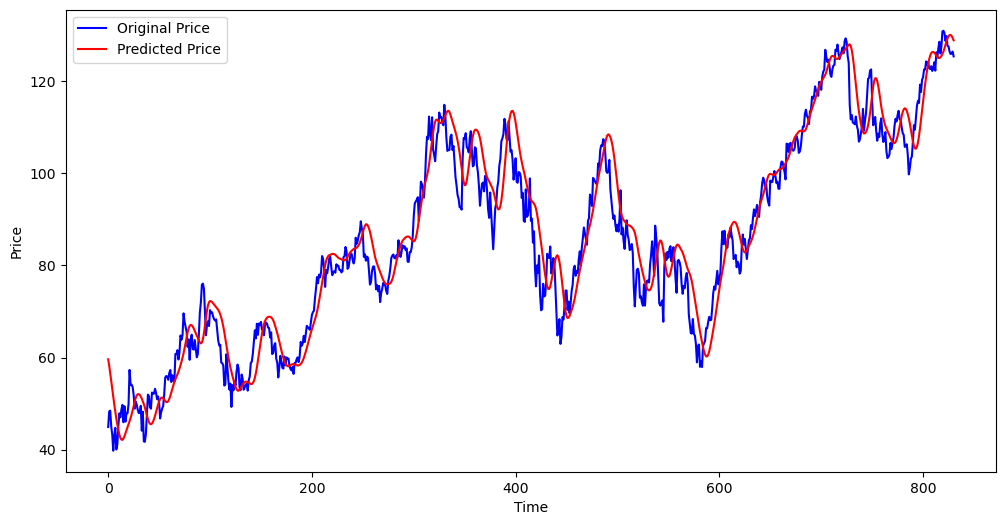

In [104]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()